In [1]:
"""
We sample strings randomly from a DFA to get regular languages. Steps: 
1. Design a DFA (regular language). 
2. Sample randomly. 
3. Write to output
"""

import random

from automata.fa.dfa import DFA
from visual_automata.fa.dfa import VisualDFA

MAX_NUMBER_PER_STRING_TYPE = int(20e3) # for both accepting and rejecting
MAX_STRING_SIZE = 8 # the max size of the strings we want to generate

# length of strings randomly selected between [1, MAX_STRING_SIZE] if set to True, 
# else all strings will be of size MAX_STRING_SIZE
VARIABLE_LENGTH = True 

OUTF_NAME = "problem_1_train.dat"

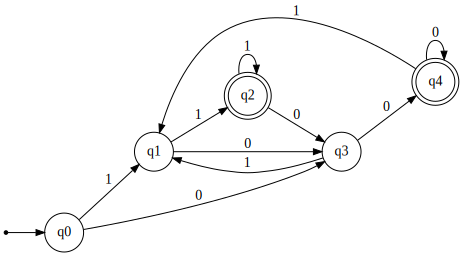

In [7]:
# this one accepts any string ending with 00 or 11, taken from https://pypi.org/project/visual-automata/#visualdfa

dfa = DFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

dfa_visual = VisualDFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)
dfa_visual.show_diagram()

# this one accepts any string ending with 00 or 11, taken from https://pypi.org/project/visual-automata/#visualdfa

dfa = DFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)

dfa_visual = VisualDFA(
    states={"q0", "q1", "q2", "q3", "q4"},
    input_symbols={"0", "1"},
    transitions={
        "q0": {"0": "q3", "1": "q1"},
        "q1": {"0": "q3", "1": "q2"},
        "q2": {"0": "q3", "1": "q2"},
        "q3": {"0": "q4", "1": "q1"},
        "q4": {"0": "q4", "1": "q1"},
    },
    initial_state="q0",
    final_states={"q2", "q4"},
)
dfa_visual.show_diagram()

In [3]:
dfa.accepts_input("101")

False

In [4]:
input_alphabet = list(dfa.input_symbols)
input_alphabet

['0', '1']

In [5]:
def generate_random_string(alphabet, size, random_length=False):
    """
    alphabet: list(string)
    size: int
    """
    res = ""
    output_size = size if not random_length else random.randint(1, size)
    for i in range(output_size):
        res += random.choice(alphabet)
    return res

accepting_counter = 0
rejecting_counter = 0

strings = list()
labels = list()

while accepting_counter < MAX_NUMBER_PER_STRING_TYPE and rejecting_counter < MAX_NUMBER_PER_STRING_TYPE:
    s = generate_random_string(input_alphabet, MAX_STRING_SIZE, random_length=VARIABLE_LENGTH)
    if dfa.accepts_input(s) and accepting_counter < MAX_NUMBER_PER_STRING_TYPE:
        strings.append(s)
        labels.append("1")
        
        accepting_counter += 1
        if accepting_counter % 1000 == 0:
            print("Accepting strings: ", accepting_counter)
            
    elif not dfa.accepts_input(s) and rejecting_counter < MAX_NUMBER_PER_STRING_TYPE:
        strings.append(s)
        labels.append("0")
        
        rejecting_counter += 1
        if rejecting_counter % 1000 == 0:
            print("Rejecting strings: ", rejecting_counter)

Rejecting strings:  1000
Accepting strings:  1000
Rejecting strings:  2000
Accepting strings:  2000
Rejecting strings:  3000
Accepting strings:  3000
Rejecting strings:  4000
Rejecting strings:  5000
Accepting strings:  4000
Rejecting strings:  6000
Accepting strings:  5000
Rejecting strings:  7000
Accepting strings:  6000
Rejecting strings:  8000
Accepting strings:  7000
Rejecting strings:  9000
Rejecting strings:  10000
Accepting strings:  8000
Rejecting strings:  11000
Accepting strings:  9000
Rejecting strings:  12000
Accepting strings:  10000
Rejecting strings:  13000
Rejecting strings:  14000
Accepting strings:  11000
Rejecting strings:  15000
Accepting strings:  12000
Rejecting strings:  16000
Accepting strings:  13000
Rejecting strings:  17000
Accepting strings:  14000
Rejecting strings:  18000
Rejecting strings:  19000
Accepting strings:  15000
Rejecting strings:  20000


In [6]:
with open(OUTF_NAME, "wt") as outf:
    outf.write("{} {}".format(len(strings), len(input_alphabet)))
    for s, l in zip(strings, labels):
        outf.write("\n{} {} {}".format(l, len(s), " ".join(s)))